In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import random
import math
from operator import index
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import xgboost as xgb
import lightgbm as lgb

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


#Preprocessing


In [ ]:
# Load dataset
df = pd.read_csv('Nasa.csv')

In [ ]:
# Review the structure of the dataset
print("\nData size:")
print(df.shape)
print("\nData samples:")
print(df.head())
print("\nData description:")
print(df.describe())
print("\nData Info:")
print(df.info())
print(df.tail)


Data size:
(904, 27)

Data samples:
        ID  Neo Reference ID                Name Limited Name  Designation  \
0  2000433           2000433  433 Eros (A898 PA)         Eros          433   
1  2000433           2000433  433 Eros (A898 PA)         Eros          433   
2  2000433           2000433  433 Eros (A898 PA)         Eros          433   
3  2000433           2000433  433 Eros (A898 PA)         Eros          433   
4  2000433           2000433  433 Eros (A898 PA)         Eros          433   

                                    NASA JPL URL  Absolute Magnitude (H)  \
0  http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000433                   10.41   
1  http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000433                   10.41   
2  http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000433                   10.41   
3  http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000433                   10.41   
4  http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000433                   10.41   

   Min Diameter (km)  Max Diameter (k

<Figure size 640x480 with 0 Axes>

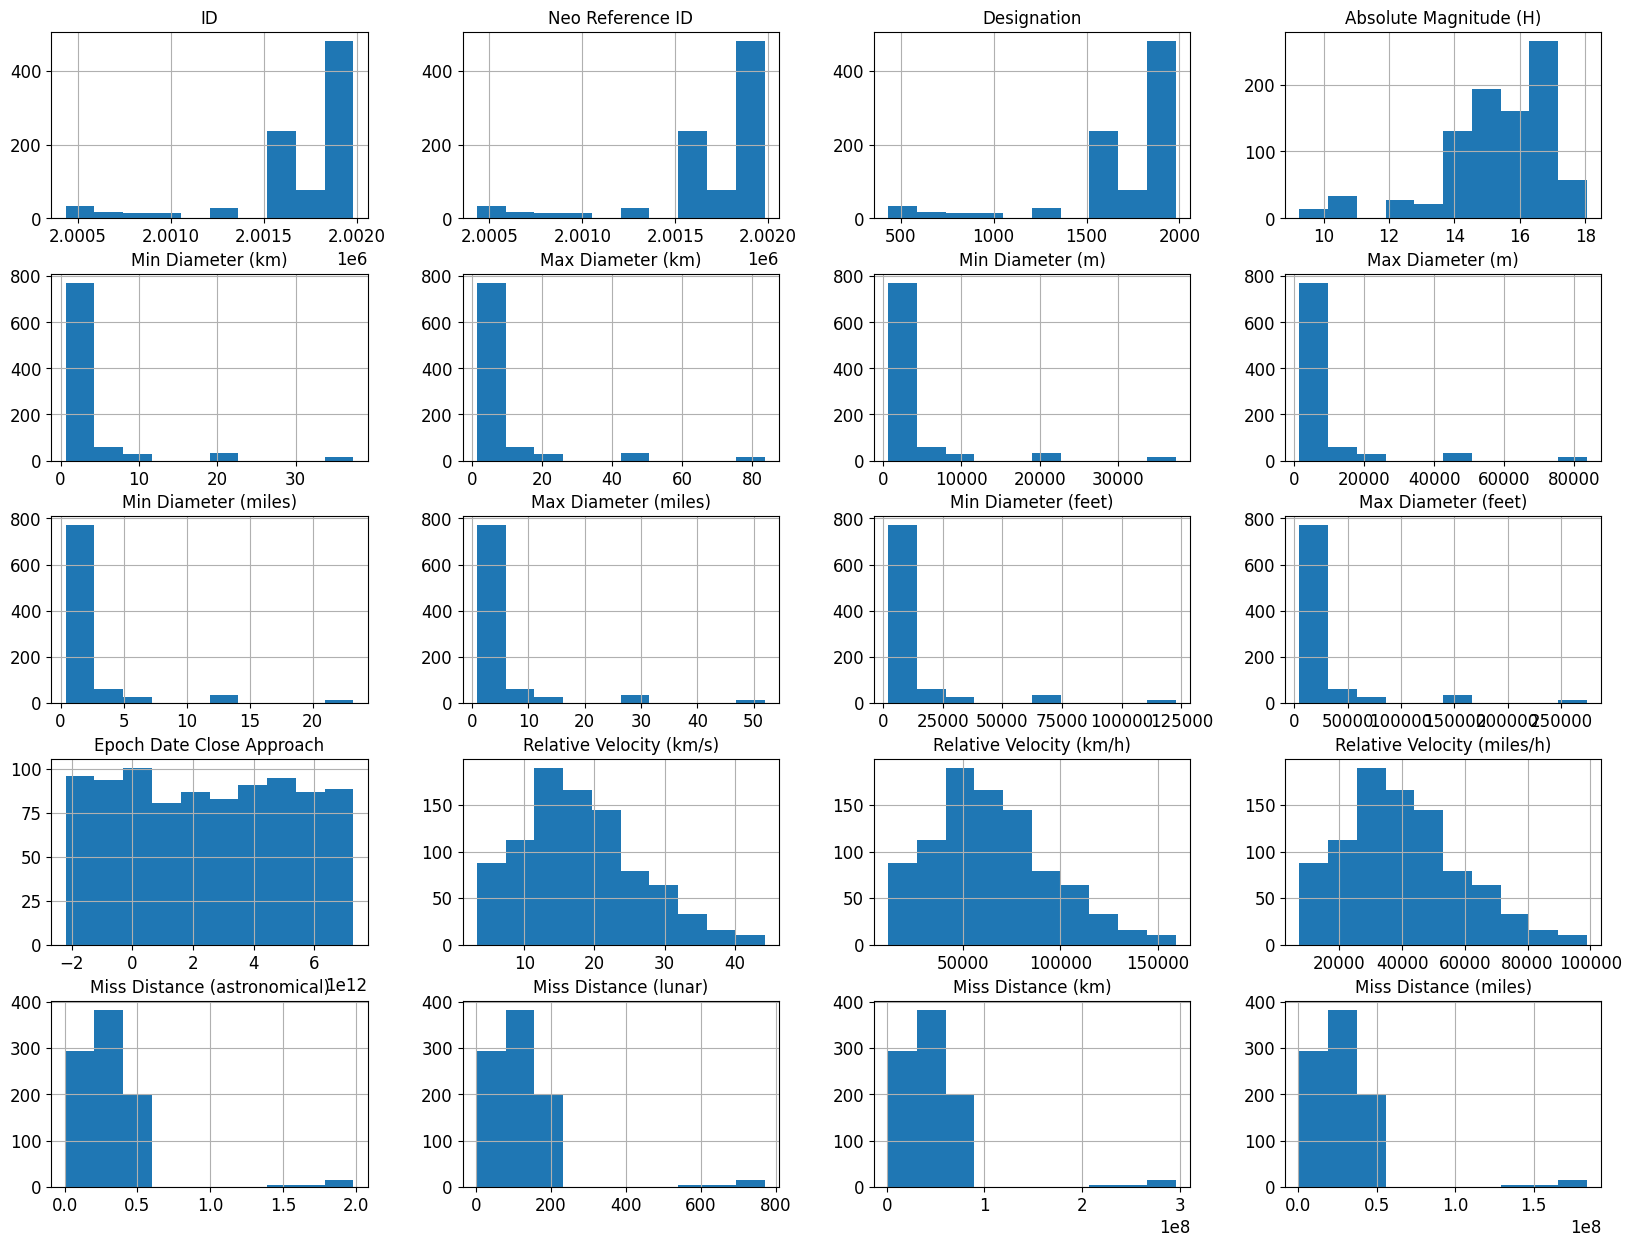

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
df.hist(figsize=(20,15))
plt.figure()

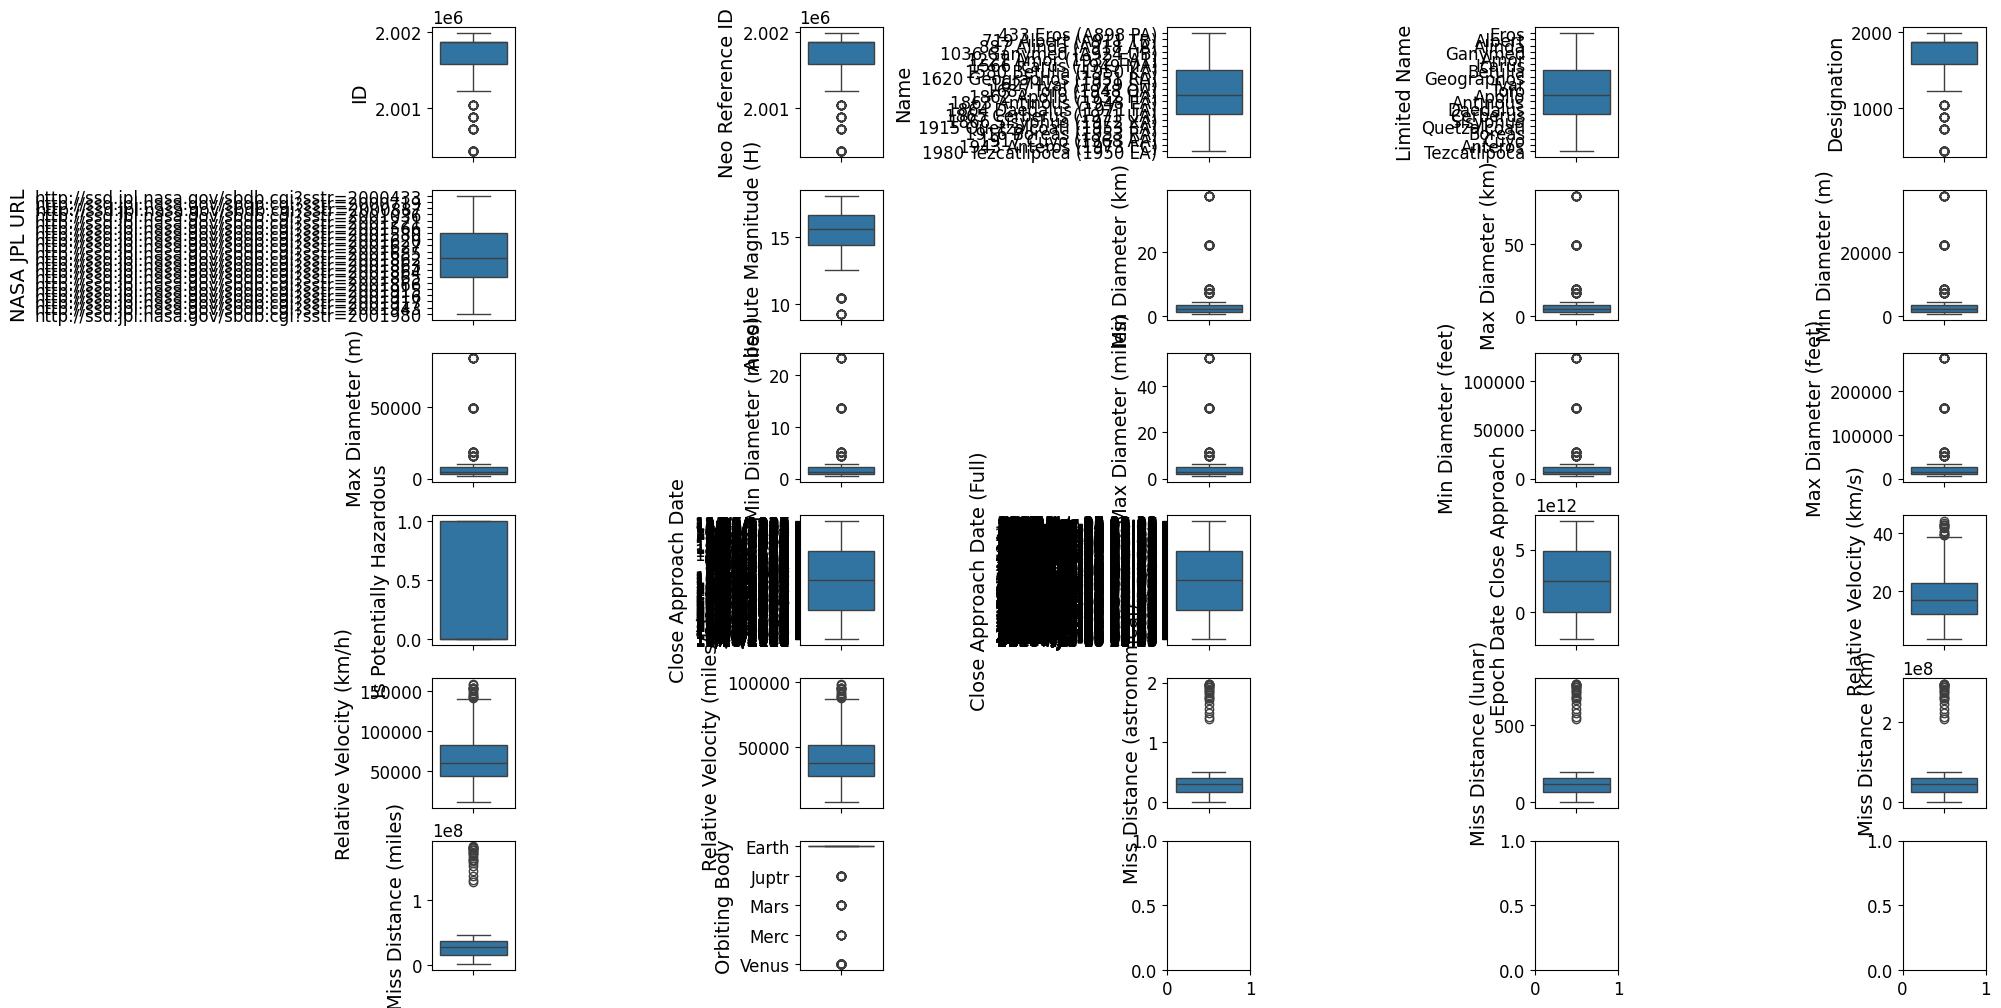

In [ ]:
# Assuming 'data' is a dictionary-like object
num_plots = len(df.keys())  # Number of subplots needed
ncols = 5  # Number of columns
nrows = math.ceil(num_plots / ncols)  # Dynamically calculate rows based on data size

fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(20, 10))
axs = axs.flatten()

index = 0
for k, v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1

plt.tight_layout(pad=0.4, w_pad=0.8, h_pad=0.5)


ID                                int64
Neo Reference ID                  int64
Name                             object
Limited Name                     object
Designation                       int64
NASA JPL URL                     object
Absolute Magnitude (H)          float64
Min Diameter (km)               float64
Max Diameter (km)               float64
Min Diameter (m)                float64
Max Diameter (m)                float64
Min Diameter (miles)            float64
Max Diameter (miles)            float64
Min Diameter (feet)             float64
Max Diameter (feet)             float64
Is Potentially Hazardous           bool
Close Approach Date              object
Close Approach Date (Full)       object
Epoch Date Close Approach       float64
Relative Velocity (km/s)        float64
Relative Velocity (km/h)        float64
Relative Velocity (miles/h)     float64
Miss Distance (astronomical)    float64
Miss Distance (lunar)           float64
Miss Distance (km)              float64


<Axes: >

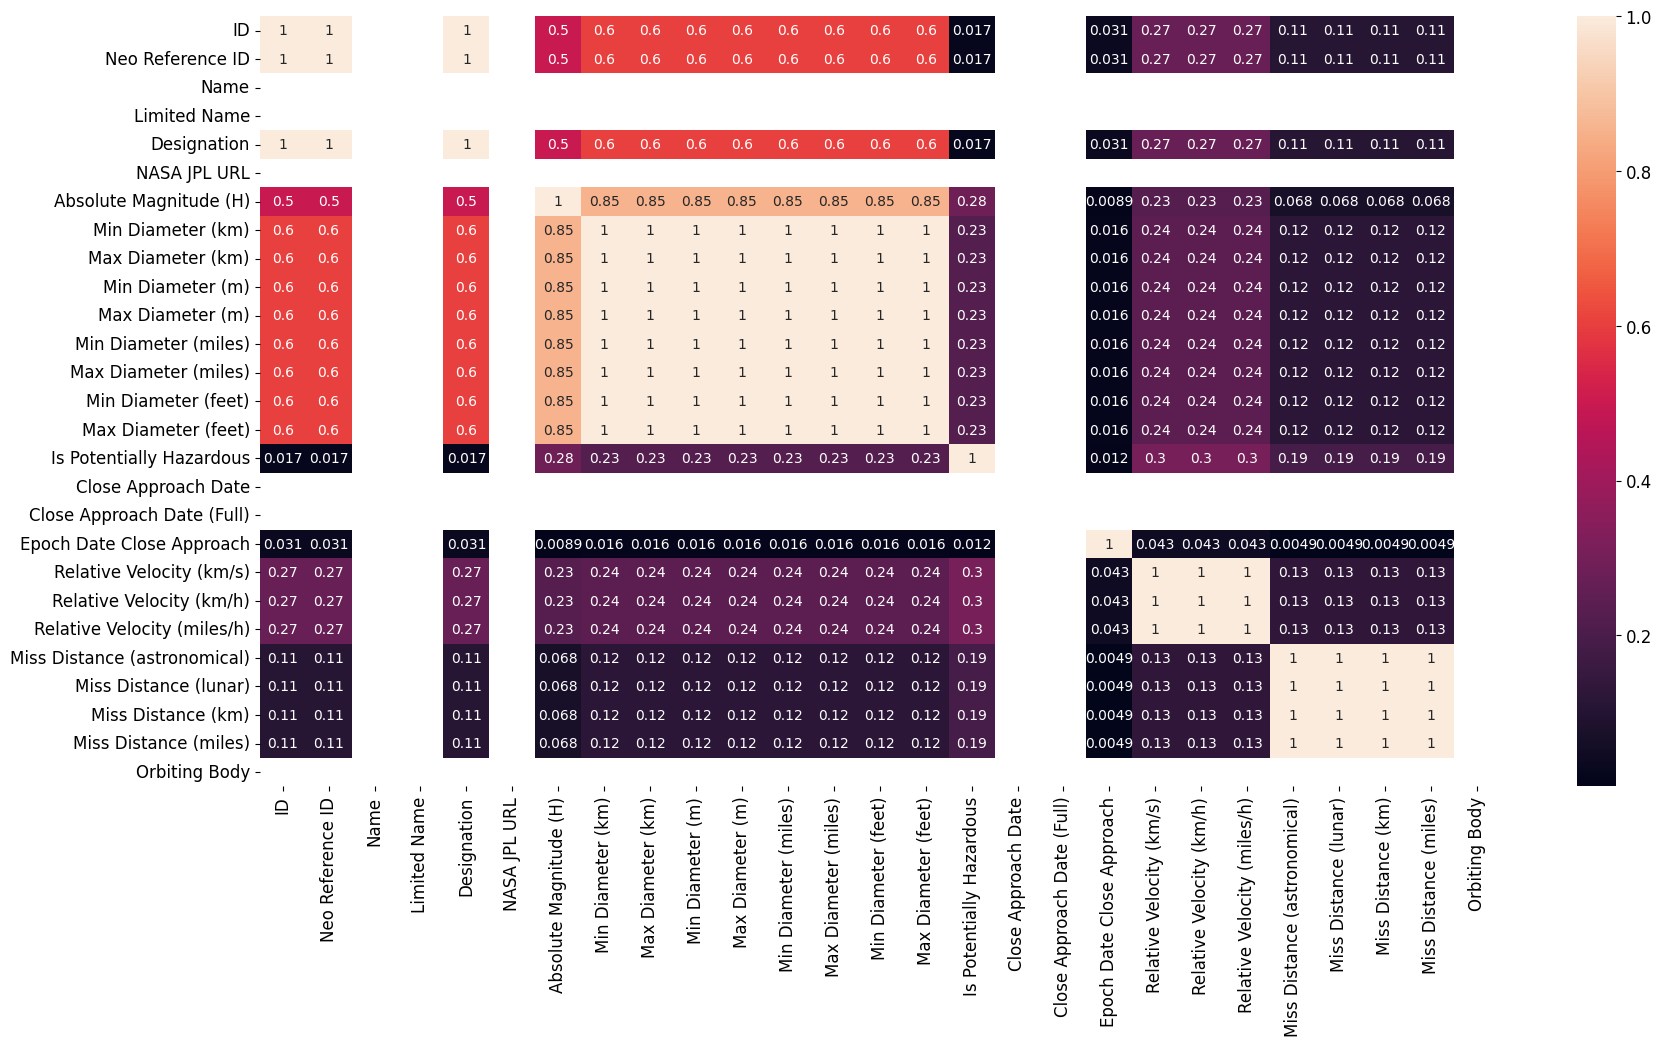

In [ ]:
# Check the data types of the columns
print(df.dtypes)
vis_data = df.copy()
# Identify the columns with non-numeric data
non_numeric_cols = vis_data.select_dtypes(include=['object']).columns

# Convert the non-numeric columns to numeric

for col in non_numeric_cols:
    vis_data[col] = pd.to_numeric(vis_data[col], errors='coerce')

# Generate the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(vis_data.corr().abs(), annot=True)

In [ ]:
#Data preprocessing & Splitting

#Drop irreleavent features
irrelevant_columns =['ID', 'Neo Reference ID', 'Name','NASA JPL URL', 'Close Approach Date',
                  'Limited Name',   'Close Approach Date (Full)', 'Epoch Date Close Approach', 'Designation',  'Relative Velocity (km/h)', 'Orbiting Body' ]

df = df.drop(columns=irrelevant_columns)

print("\nAfter dropping irrelevant columns:")
print(df.head())


After dropping irrelevant columns:
   Absolute Magnitude (H)  Min Diameter (km)  Max Diameter (km)  \
0                   10.41          22.006703          49.208483   
1                   10.41          22.006703          49.208483   
2                   10.41          22.006703          49.208483   
3                   10.41          22.006703          49.208483   
4                   10.41          22.006703          49.208483   

   Min Diameter (m)  Max Diameter (m)  Min Diameter (miles)  \
0       22006.70271       49208.48322             13.674327   
1       22006.70271       49208.48322             13.674327   
2       22006.70271       49208.48322             13.674327   
3       22006.70271       49208.48322             13.674327   
4       22006.70271       49208.48322             13.674327   

   Max Diameter (miles)  Min Diameter (feet)  Max Diameter (feet)  \
0             30.576724          72200.47052          161445.1601   
1             30.576724          72200.47052

In [ ]:
# Encode categorical features
y = df['Is Potentially Hazardous'].apply(lambda x: 1 if x else 0)
X = df.drop(columns=['Is Potentially Hazardous'])

In [ ]:
#Check for missing values
print("Missing Values in Each Column:")
print(df.isnull().sum())

#Fill missing values with median for numerical columns
df.fillna(df.median(numeric_only=True), inplace=True)

print("\nAfter fill missing values with median for numerical columns:")
print(df.isnull().sum())

Missing Values in Each Column:
Absolute Magnitude (H)          0
Min Diameter (km)               0
Max Diameter (km)               0
Min Diameter (m)                0
Max Diameter (m)                0
Min Diameter (miles)            0
Max Diameter (miles)            0
Min Diameter (feet)             0
Max Diameter (feet)             0
Is Potentially Hazardous        0
Relative Velocity (km/s)        0
Relative Velocity (miles/h)     0
Miss Distance (astronomical)    0
Miss Distance (lunar)           0
Miss Distance (km)              0
Miss Distance (miles)           0
dtype: int64

After fill missing values with median for numerical columns:
Absolute Magnitude (H)          0
Min Diameter (km)               0
Max Diameter (km)               0
Min Diameter (m)                0
Max Diameter (m)                0
Min Diameter (miles)            0
Max Diameter (miles)            0
Min Diameter (feet)             0
Max Diameter (feet)             0
Is Potentially Hazardous        0
Relative V

In [ ]:
# Assuming X and y are your feature matrix and target vector
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# One-hot encode the target variable
num_classes = 2
y_train_one_hot = np.eye(num_classes)[y_train.astype(int)]
y_val_one_hot = np.eye(num_classes)[y_val.astype(int)]
y_test_one_hot = np.eye(num_classes)[y_test.astype(int)]

In [ ]:
#Final check
print("\nData after preprocessing:")
print(df.head())
print(df.columns)


Data after preprocessing:
   Absolute Magnitude (H)  Min Diameter (km)  Max Diameter (km)  \
0                   10.41          22.006703          49.208483   
1                   10.41          22.006703          49.208483   
2                   10.41          22.006703          49.208483   
3                   10.41          22.006703          49.208483   
4                   10.41          22.006703          49.208483   

   Min Diameter (m)  Max Diameter (m)  Min Diameter (miles)  \
0       22006.70271       49208.48322             13.674327   
1       22006.70271       49208.48322             13.674327   
2       22006.70271       49208.48322             13.674327   
3       22006.70271       49208.48322             13.674327   
4       22006.70271       49208.48322             13.674327   

   Max Diameter (miles)  Min Diameter (feet)  Max Diameter (feet)  \
0             30.576724          72200.47052          161445.1601   
1             30.576724          72200.47052         

In [ ]:
print("x_train shape:",X_train.shape)
print("x_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (578, 15)
x_test shape: (181, 15)
y_train shape: (578,)
y_test shape: (181,)


#ANN


In [ ]:
class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        self.weights_input_hidden = np.random.randn(input_size, hidden_size) / np.sqrt(input_size)
        self.weights_hidden_output = np.random.randn(hidden_size, output_size) / np.sqrt(hidden_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.bias_output = np.zeros((1, output_size))
        self.loss_history = []

    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return (x > 0).astype(float)

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def forward(self, X):
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = self.relu(self.hidden_input)
        self.final_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.final_output = self.softmax(self.final_input)
        return self.final_output

    def backward(self, X, y, output, learning_rate):
        output_error = output - y
        hidden_error = np.dot(output_error, self.weights_hidden_output.T) * self.relu_derivative(self.hidden_input)

        self.weights_hidden_output -= learning_rate * np.dot(self.hidden_output.T, output_error)
        self.bias_output -= learning_rate * np.sum(output_error, axis=0, keepdims=True)
        self.weights_input_hidden -= learning_rate * np.dot(X.T, hidden_error)
        self.bias_hidden -= learning_rate * np.sum(hidden_error, axis=0, keepdims=True)

    def train(self, X, y, epochs, learning_rate, X_val, y_val):
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output, learning_rate)

            train_loss = self.calculate_loss(X, y)
            val_loss = self.calculate_loss(X_val, y_val)
            train_acc = self.calculate_accuracy(X, y)
            val_acc = self.calculate_accuracy(X_val, y_val)

            self.loss_history.append((train_loss, val_loss))

            if (epoch+1) % 2 == 0:
                print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}')


    def calculate_loss(self, X, y):
        output = self.forward(X)
        return -np.sum(y * np.log(np.clip(output, 1e-15, 1-1e-15))) / X.shape[0]

    def calculate_accuracy(self, X, y):
        predictions = self.predict(X)
        return np.mean(predictions == np.argmax(y, axis=1))

    def predict(self, X):
        output = self.forward(X)
        return np.argmax(output, axis=1)


In [ ]:
# Print some data statistics
print(f"Number of features: {X_train.shape[1]}")
print(f"Number of classes: {num_classes}")
print(f"Training samples: {X_train.shape[0]}")
print(f"Validation samples: {X_val.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")
print(f"Class distribution in training set: {np.bincount(y_train)}")

input_size = X_train.shape[1]
hidden_size = 3
output_size = num_classes

mlp = MLP(input_size, hidden_size, output_size)
mlp.train(X_train_scaled, y_train_one_hot, epochs=5, learning_rate=0.0001, X_val=X_val_scaled, y_val=y_val_one_hot)

# Final evaluation
train_acc = mlp.calculate_accuracy(X_train_scaled, y_train_one_hot)
val_acc = mlp.calculate_accuracy(X_val_scaled, y_val_one_hot)
test_acc = mlp.calculate_accuracy(X_test_scaled, y_test_one_hot)

print(f"\nFinal Train accuracy: {train_acc:.4f}")
print(f"Final Validation accuracy: {val_acc:.4f}")
print(f"Final Test accuracy: {test_acc:.4f}")

Number of features: 15
Number of classes: 2
Training samples: 578
Validation samples: 145
Test samples: 181
Class distribution in training set: [395 183]
Epoch 2, Train Loss: 0.6962, Val Loss: 0.6902, Train Acc: 0.6747, Val Acc: 0.7172
Epoch 4, Train Loss: 0.6888, Val Loss: 0.6807, Train Acc: 0.7007, Val Acc: 0.7793

Final Train accuracy: 0.6990
Final Validation accuracy: 0.7724
Final Test accuracy: 0.7182


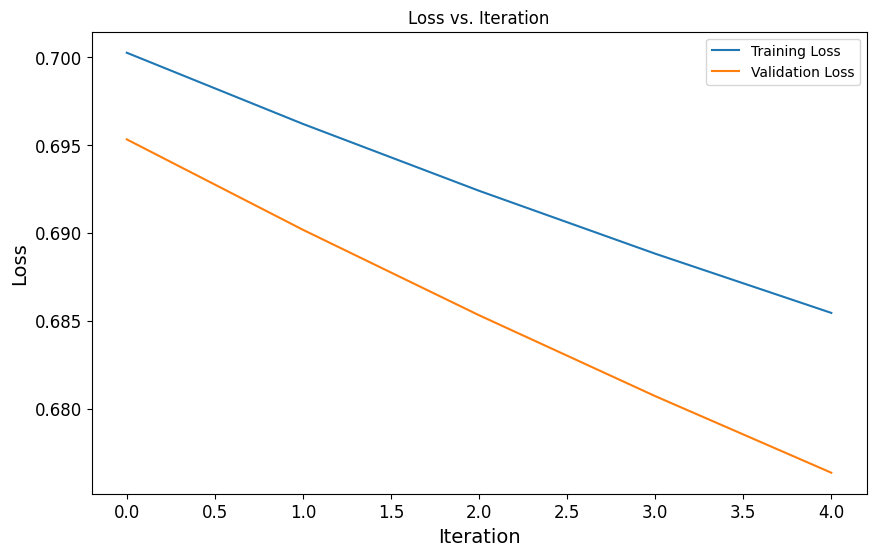

In [ ]:
def plot_loss_history(mlp):
    train_loss, val_loss = zip(*mlp.loss_history)
    plt.figure(figsize=(10, 6))
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Loss vs. Iteration')
    plt.legend()
    plt.show()


# Plot loss history
plot_loss_history(mlp)

Feature Importance:
Miss Distance (km): 0.0347
Miss Distance (miles): 0.0372
Miss Distance (astronomical): 0.0411
Max Diameter (miles): 0.0448
Min Diameter (m): 0.0453
Is Potentially Hazardous: 0.0503
Absolute Magnitude (H): 0.0636
Max Diameter (m): 0.0715
Max Diameter (feet): 0.0735
Min Diameter (miles): 0.0774
Max Diameter (km): 0.0786
Min Diameter (feet): 0.0837
Miss Distance (lunar): 0.0870
Min Diameter (km): 0.0948
Relative Velocity (miles/h): 0.1166


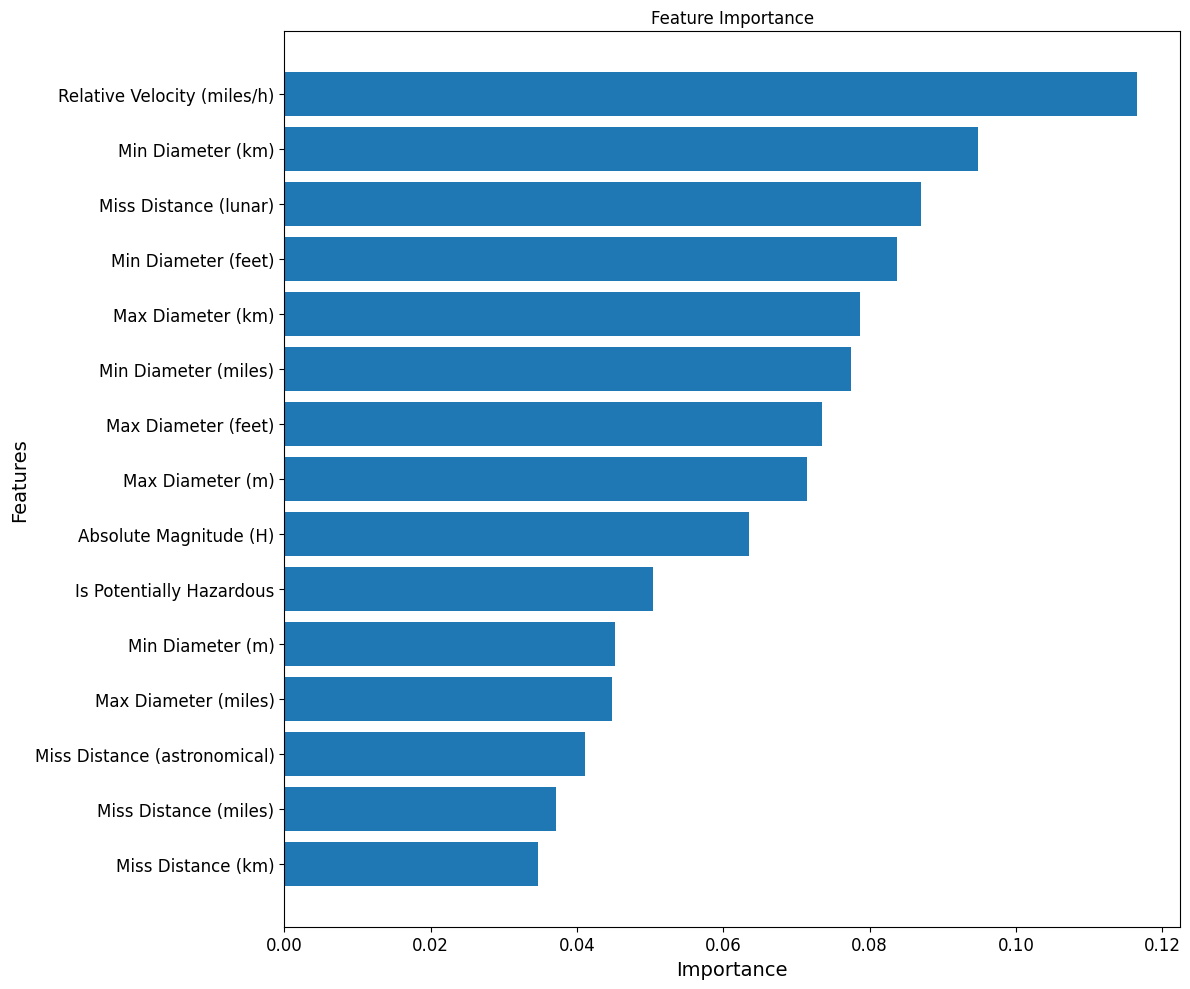

In [ ]:
def calculate_feature_importance(mlp):
    input_hidden_weights = mlp.weights_input_hidden
    abs_weights = np.abs(input_hidden_weights)
    feature_importance = np.sum(abs_weights, axis=1)
    feature_importance = feature_importance / np.sum(feature_importance)
    return feature_importance

# List of feature names
feature_names = [
    "Absolute Magnitude (H)", "Min Diameter (km)", "Max Diameter (km)",
    "Min Diameter (m)", "Max Diameter (m)", "Min Diameter (miles)", "Max Diameter (miles)",
    "Min Diameter (feet)", "Max Diameter (feet)", "Is Potentially Hazardous",
    "Relative Velocity (miles/h)",
    "Miss Distance (astronomical)", "Miss Distance (lunar)", "Miss Distance (km)",
    "Miss Distance (miles)"
]

# Assuming 'mlp' is your trained MLP model
feature_importance = calculate_feature_importance(mlp)

# Sort features by importance
sorted_idx = np.argsort(feature_importance)
sorted_features = np.array(feature_names)[sorted_idx]
sorted_importance = feature_importance[sorted_idx]

# Print feature importance
print("Feature Importance:")
for feature, importance in zip(sorted_features, sorted_importance):
    print(f"{feature}: {importance:.4f}")

# Visualize the feature importance
plt.figure(figsize=(12, 10))
plt.barh(sorted_features, sorted_importance)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


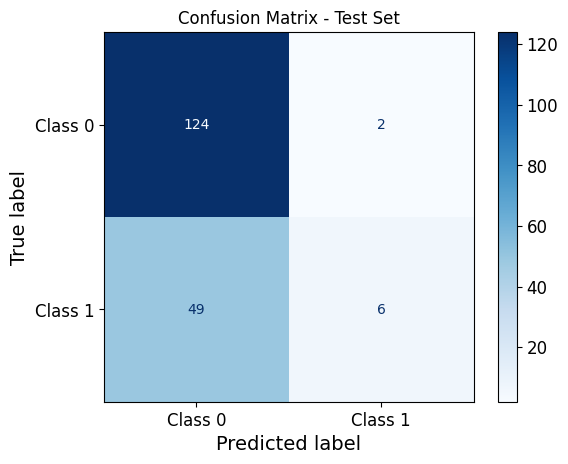

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.98      0.83       126
           1       0.75      0.11      0.19        55

    accuracy                           0.72       181
   macro avg       0.73      0.55      0.51       181
weighted avg       0.73      0.72      0.64       181



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Generate predictions for the test set
y_pred_test_class = mlp.predict(X_test_scaled)  # Predicted class labels
y_test_true = np.argmax(y_test_one_hot, axis=1)  # True class labels

# Calculate the confusion matrix
cm = confusion_matrix(y_test_true, y_pred_test_class)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[f"Class {i}" for i in range(output_size)])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Test Set")
plt.show()

# Print the classification report
print("Classification Report:")
print(classification_report(y_test_true, y_pred_test_class))


#Logistic Regression

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, classification_report

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Define the logistic regression model using PyTorch
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)


    def forward(self, x):
        return torch.sigmoid(self.linear(x))




In [ ]:
# Initialize the model, loss function, and optimizer
input_dim = X_train.shape[1]
model = LogisticRegressionModel(input_dim)
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.1)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Store losses for plotting
train_losses = []
val_losses = []

# Training loop with loss tracking
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Store training loss
    train_losses.append(loss.item())

    # Calculate validation loss
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)
        val_losses.append(val_loss.item())

    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')


Epoch [100/1000], Loss: 0.4391, Validation Loss: 0.4375
Epoch [200/1000], Loss: 0.3992, Validation Loss: 0.3996
Epoch [300/1000], Loss: 0.3717, Validation Loss: 0.3719
Epoch [400/1000], Loss: 0.3524, Validation Loss: 0.3514
Epoch [500/1000], Loss: 0.3380, Validation Loss: 0.3352
Epoch [600/1000], Loss: 0.3266, Validation Loss: 0.3218
Epoch [700/1000], Loss: 0.3174, Validation Loss: 0.3105
Epoch [800/1000], Loss: 0.3098, Validation Loss: 0.3008
Epoch [900/1000], Loss: 0.3033, Validation Loss: 0.2924
Epoch [1000/1000], Loss: 0.2979, Validation Loss: 0.2850


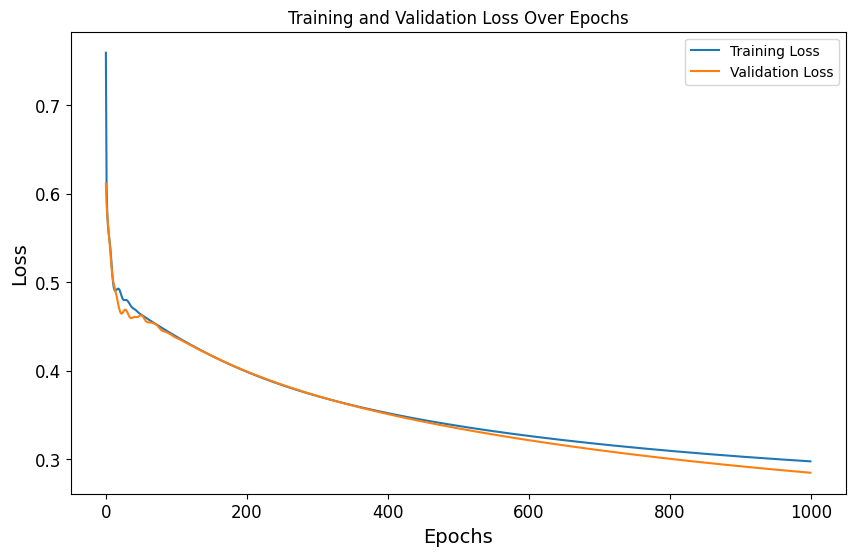

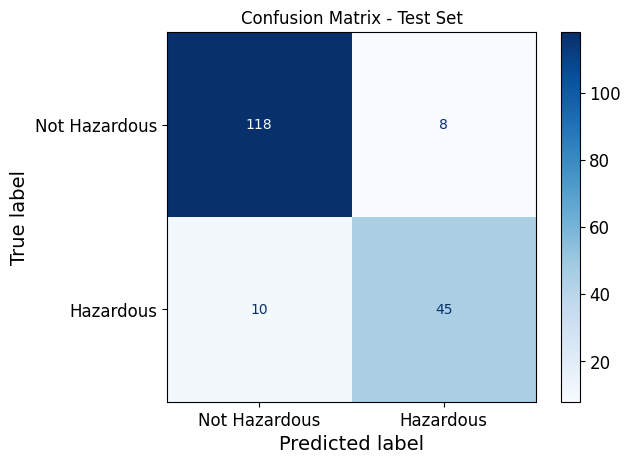

In [ ]:

# Plot training and validation losses
plt.figure(figsize=(10, 6))
plt.plot(range(num_epochs), train_losses, label='Training Loss')
plt.plot(range(num_epochs), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

# Confusion matrix for test set
with torch.no_grad():
    y_test_pred = model(X_test_tensor)
    y_test_pred_labels = (y_test_pred >= 0.5).float()  # Threshold of 0.5 for binary classification

# Convert to numpy for sklearn confusion matrix
y_test_true = y_test_tensor.numpy().ravel()
y_test_pred_labels = y_test_pred_labels.numpy().ravel()

# Compute confusion matrix
cm = confusion_matrix(y_test_true, y_test_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Hazardous", "Hazardous"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Test Set")
plt.show()


In [ ]:
# Evaluate the model
with torch.no_grad():
    y_pred_test = model(X_test_tensor)
    y_pred_test_class = (y_pred_test > 0.5).float()
    test_accuracy = accuracy_score(y_test, y_pred_test_class.numpy())
    report = classification_report(y_test, y_pred_test_class.numpy())

print("Adam Optimized Model Test Accuracy:", test_accuracy)
print("Adam Optimized Model Test Classification Report:\n", report)

Adam Optimized Model Test Accuracy: 0.9005524861878453
Adam Optimized Model Test Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       126
           1       0.85      0.82      0.83        55

    accuracy                           0.90       181
   macro avg       0.89      0.88      0.88       181
weighted avg       0.90      0.90      0.90       181



#GXBoosting


In [ ]:
# Assuming X and y are your feature matrix and target vector
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# One-hot encode the target variable
num_classes = 2
y_train_one_hot = np.eye(num_classes)[y_train.astype(int)]
y_val_one_hot = np.eye(num_classes)[y_val.astype(int)]
y_test_one_hot = np.eye(num_classes)[y_test.astype(int)]

#Final check
print("\nData after preprocessing:")
print(df.head())

print("x_train shape:",X_train.shape)
print("x_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)


Data after preprocessing:
   Absolute Magnitude (H)  Min Diameter (km)  Max Diameter (km)  \
0                   10.41          22.006703          49.208483   
1                   10.41          22.006703          49.208483   
2                   10.41          22.006703          49.208483   
3                   10.41          22.006703          49.208483   
4                   10.41          22.006703          49.208483   

   Min Diameter (m)  Max Diameter (m)  Min Diameter (miles)  \
0       22006.70271       49208.48322             13.674327   
1       22006.70271       49208.48322             13.674327   
2       22006.70271       49208.48322             13.674327   
3       22006.70271       49208.48322             13.674327   
4       22006.70271       49208.48322             13.674327   

   Max Diameter (miles)  Min Diameter (feet)  Max Diameter (feet)  \
0             30.576724          72200.47052          161445.1601   
1             30.576724          72200.47052         

In [ ]:
eval_set = [(X_train_scaled, y_train), (X_val_scaled, y_val)]
model = xgb.XGBClassifier(
    booster='gbtree',
    n_estimators=30,
    max_depth=6,              # Good for 15 features
    learning_rate=0.02,
    min_child_weight=4,
    subsample=0.8,
    colsample_bytree=0.8,     # Will use ~12 features per tree
    scale_pos_weight=1,       # Adjust if needed based on class imbalance
    random_state=42
)

model.fit(X_train_scaled, y_train, eval_set= eval_set)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100}%')

[0]	validation_0-logloss:0.60586	validation_1-logloss:0.56257
[1]	validation_0-logloss:0.58845	validation_1-logloss:0.54696
[2]	validation_0-logloss:0.57227	validation_1-logloss:0.53209
[3]	validation_0-logloss:0.55608	validation_1-logloss:0.51737
[4]	validation_0-logloss:0.54059	validation_1-logloss:0.50326
[5]	validation_0-logloss:0.52586	validation_1-logloss:0.48975
[6]	validation_0-logloss:0.51199	validation_1-logloss:0.47707
[7]	validation_0-logloss:0.49869	validation_1-logloss:0.46490
[8]	validation_0-logloss:0.48546	validation_1-logloss:0.45279
[9]	validation_0-logloss:0.47297	validation_1-logloss:0.44147
[10]	validation_0-logloss:0.46068	validation_1-logloss:0.43020
[11]	validation_0-logloss:0.44885	validation_1-logloss:0.41933
[12]	validation_0-logloss:0.43745	validation_1-logloss:0.40885
[13]	validation_0-logloss:0.42643	validation_1-logloss:0.39871
[14]	validation_0-logloss:0.41579	validation_1-logloss:0.38891
[15]	validation_0-logloss:0.40703	validation_1-logloss:0.38044
[1

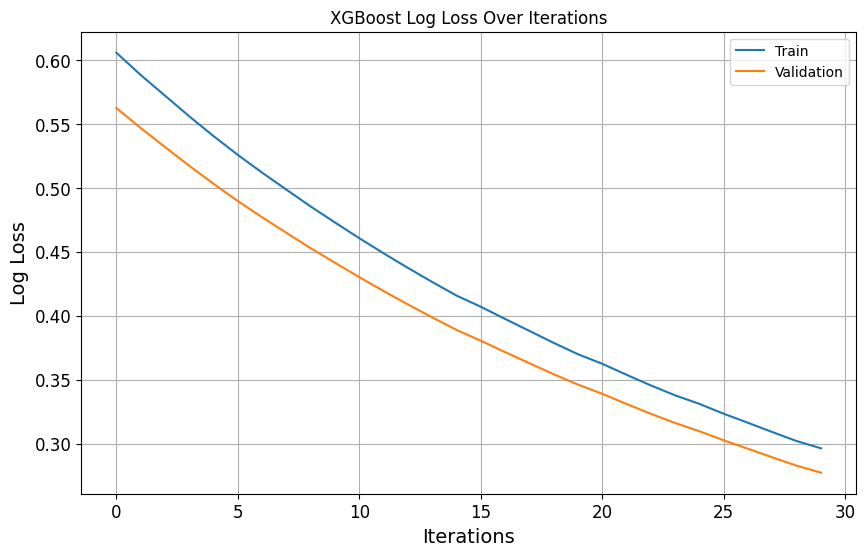

In [ ]:
# Assuming you have the evaluation results from model.fit
results = model.evals_result()

plt.figure(figsize=(10, 6))
plt.plot(results['validation_0']['logloss'], label='Train')
plt.plot(results['validation_1']['logloss'], label='Validation')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss Over Iterations')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       126
           1       1.00      0.98      0.99        55

    accuracy                           0.99       181
   macro avg       1.00      0.99      0.99       181
weighted avg       0.99      0.99      0.99       181



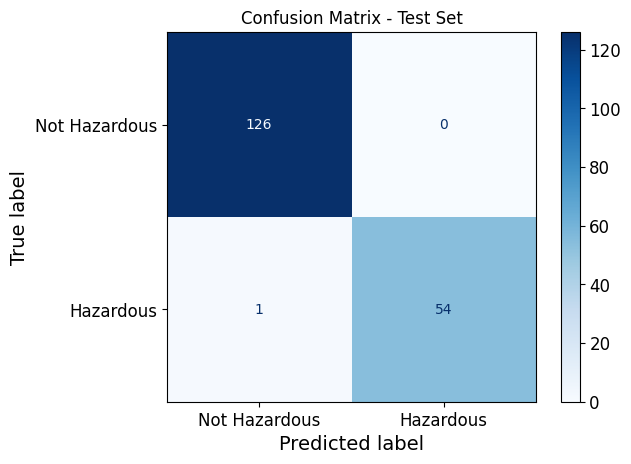

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Hazardous", "Hazardous"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Test Set")
plt.show()


In [ ]:
print(y_train.value_counts())
print(y_test.value_counts())
print(y_val.value_counts())

Is Potentially Hazardous
0    395
1    183
Name: count, dtype: int64
Is Potentially Hazardous
0    126
1     55
Name: count, dtype: int64
Is Potentially Hazardous
0    108
1     37
Name: count, dtype: int64


#Naive Bayes


In [ ]:
# Assuming X and y are your feature matrix and target vector
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# One-hot encode the target variable
num_classes = 2
y_train_one_hot = np.eye(num_classes)[y_train.astype(int)]
y_val_one_hot = np.eye(num_classes)[y_val.astype(int)]
y_test_one_hot = np.eye(num_classes)[y_test.astype(int)]

#Final check
print("\nData after preprocessing:")
print(df.head())

print("x_train shape:",X_train.shape)
print("x_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)


Data after preprocessing:
   Absolute Magnitude (H)  Min Diameter (km)  Max Diameter (km)  \
0                   10.41          22.006703          49.208483   
1                   10.41          22.006703          49.208483   
2                   10.41          22.006703          49.208483   
3                   10.41          22.006703          49.208483   
4                   10.41          22.006703          49.208483   

   Min Diameter (m)  Max Diameter (m)  Min Diameter (miles)  \
0       22006.70271       49208.48322             13.674327   
1       22006.70271       49208.48322             13.674327   
2       22006.70271       49208.48322             13.674327   
3       22006.70271       49208.48322             13.674327   
4       22006.70271       49208.48322             13.674327   

   Max Diameter (miles)  Min Diameter (feet)  Max Diameter (feet)  \
0             30.576724          72200.47052          161445.1601   
1             30.576724          72200.47052         

In [ ]:

class NaiveBayes:

    def fit(self, X, y):
        self.classes = np.unique(y)
        # calculate prior probabilities
        self.priors = X.groupby(y).apply(lambda x: len(x)) / len(X)
        #calculate mean, variance for each column
        self.mean = X.groupby(y).mean()
        self.var = X.groupby(y).var()

    #  Calculate Gaussian Likelihoods
    def gaussian(self, class_idx, x):
        mean = self.mean.loc[class_idx]
        var = self.var.loc[class_idx]
        eps = 1e-4 # Added in denominator to prevent division by zero
        # Calculate the Gaussian PDF
        coefficient = 1 / np.sqrt(2 * np.pi * var + eps)
        exponent = np.exp(-((x - mean) ** 2) / (2 * (var + eps)))
        # Gaussian PDF formula
        likelihood = coefficient * exponent
        return likelihood


    def predict(self, X):
        predictions = []
        for _, x in X.iterrows():
            class_probs = {}
            for i in self.classes:
                prior = np.log(self.priors[i])
                conditional = np.sum(np.log(self.gaussian(i, x)))
                class_probs[i] = prior + conditional
            predictions.append(max(class_probs, key=class_probs.get))
        return predictions

model = NaiveBayes()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100}%')



/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Accuracy: 74.03314917127072%


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.63      0.77       126
           1       0.54      1.00      0.70        55

    accuracy                           0.74       181
   macro avg       0.77      0.81      0.74       181
weighted avg       0.86      0.74      0.75       181



In [ ]:
print(y_train.value_counts())
print(y_test.value_counts())
print(y_val.value_counts())

Is Potentially Hazardous
0    395
1    183
Name: count, dtype: int64
Is Potentially Hazardous
0    126
1     55
Name: count, dtype: int64
Is Potentially Hazardous
0    108
1     37
Name: count, dtype: int64


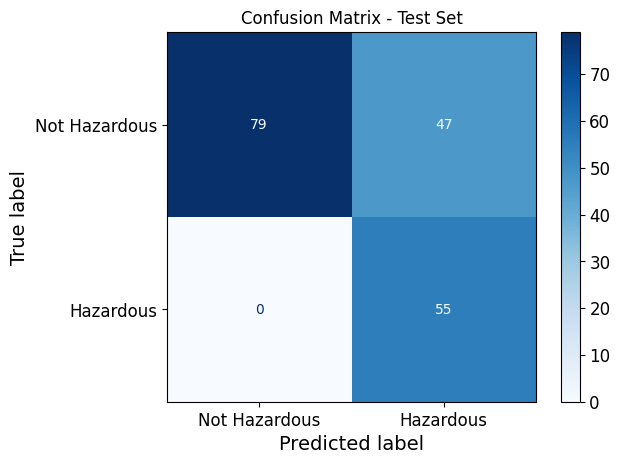

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Hazardous", "Hazardous"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Test Set")
plt.show()